In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from pmdarima.arima import auto_arima
from math import sqrt
from sklearn.metrics import mean_squared_error

In [8]:
d = pd.read_csv(r"/content/challenge_data_20.csv")
print(d.shape)
print(d.head)

(2003, 4)
<bound method NDFrame.head of             time  operating_hours  fuel_consumption(liter)   engine_id
0     2017-12-19             3726                   3404.8  8331744407
1     2017-12-20             3746                   3865.6  8331744407
2     2017-12-21             3748                   3891.2  8331744407
3     2017-12-22             3768                   3840.0  8331744407
4     2017-12-23             3776                   3891.2  8331744407
...          ...              ...                      ...         ...
1998  2018-03-25            13206                   3921.0  5452799400
1999  2018-03-26            13236                   3985.0  5452799400
2000  2018-03-27            13266                   3922.0  5452799400
2001  2018-03-28            13296                   3920.0  5452799400
2002  2018-03-29            13326                   3984.0  5452799400

[2003 rows x 4 columns]>


In [11]:
ind = d.engine_id.unique()
print(ind)
unique = []
for i in ind:
    unique.append(d[d.engine_id == i])
print(unique[0])

[8331744407 7133245688 3643747759 3308150982 8711753003 2582458400
 8481959000 7940559597 2159359786 5687959787 4569859790 3413759796
 5246759857 2654264148 3850565523 5452766296 5452799100 5452799200
 5452799300 5452799400]
           time  operating_hours  fuel_consumption(liter)   engine_id
0    2017-12-19             3726                   3404.8  8331744407
1    2017-12-20             3746                   3865.6  8331744407
2    2017-12-21             3748                   3891.2  8331744407
3    2017-12-22             3768                   3840.0  8331744407
4    2017-12-23             3776                   3891.2  8331744407
..          ...              ...                      ...         ...
96   2018-03-25             5176                   3840.0  8331744407
97   2018-03-26             5283                   3532.8  8331744407
98   2018-03-27             5303                   3865.6  8331744407
99   2018-03-28             5322                   3814.4  8331744407
100  

20


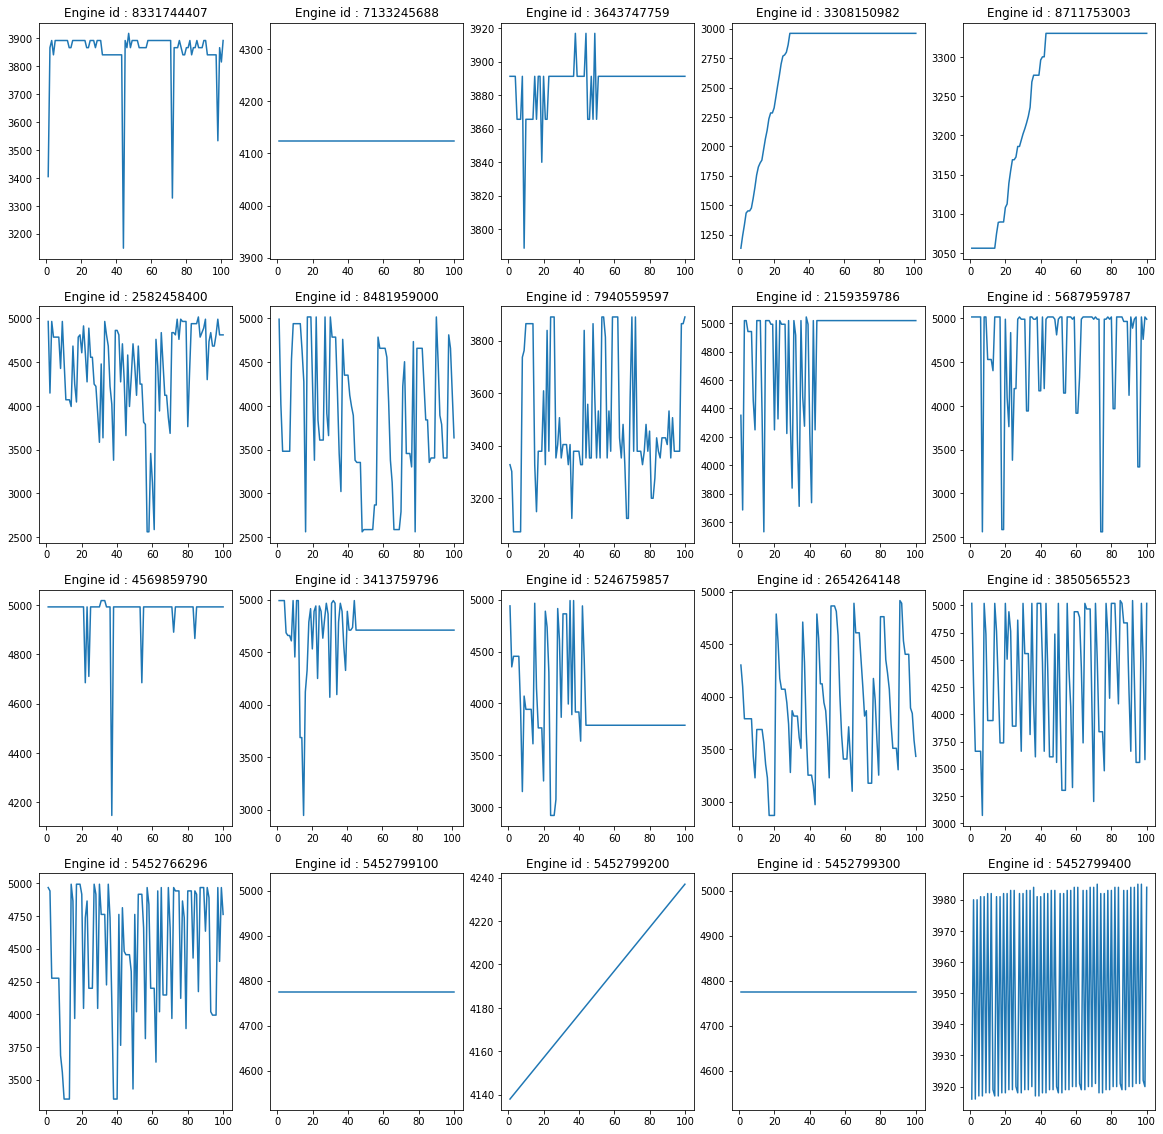

In [12]:
print(len(unique))
w = 0
f, a = plt.subplots(4, 5, figsize = (20, 20))
for j in range(4):
    for k in range(5):
        a[j,k].plot([i for i in range(1, len(unique[w]["fuel_consumption(liter)"])+1)], unique[w]["fuel_consumption(liter)"])
        a[j,k].set_title("Engine id : "+str(ind[w]))
        w = w+1
plt.show()

In [13]:
l = {}
for w in range(len(ind)):
    l[ind[w]] = unique[w]["fuel_consumption(liter)"]
model = []
forecast = []
forecast_1 = []
train = []
valid = []
rmse = []
i = 0
for w in l:
    train.append(l[w][:int(0.9*(len(l[w])))])
    valid.append(l[w][int(0.9*(len(l[w]))):])
    model.append(auto_arima(train[i], trace=True, error_action='ignore', suppress_warnings=True))
    model[i].fit(train[i])
    temp = model[i].predict(n_periods = len(valid[i])+15)
    forecast.append(temp[:len(valid[i])])
    forecast_1.append(temp[len(valid[i]):])
    n = len(valid[i])
    t = [n+j for j in range(0,15)]
    forecast[i] = pd.DataFrame(forecast[i],index = valid[i].index, columns=['Prediction'])
    forecast_1[i] = pd.DataFrame(forecast_1[i],index = t, columns=['Prediction'])
    rmse.append(sqrt(mean_squared_error(valid[i],forecast[i])))
    i = i+1

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1110.963, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1102.169, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1104.162, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1104.161, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1743.792, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1107.610, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.391 seconds
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1755.846, Time=0.01 sec
Total fit time: 0.007 seconds
Performing stepwise search to minimize aic


/usr/local/lib/python3.6/dist-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=739.586, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=795.643, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=754.822, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=739.189, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=793.643, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=737.320, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=738.266, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=738.887, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=737.002, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=738.634, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=740.502, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=735.002, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=737.642, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=736.887, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=736.664, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]  

/usr/local/lib/python3.6/dist-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
/usr/local/lib/python3.6/dist-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1782.253, Time=0.01 sec
Total fit time: 0.011 seconds
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1907.099, Time=0.07 sec
Total fit time: 0.072 seconds
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1782.253, Time=0.01 sec
Total fit time: 0.006 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=746.157, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=882.378, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=740.902, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=802.925, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1748.010, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=741.547, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=741.539, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=743.595, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.609 seconds


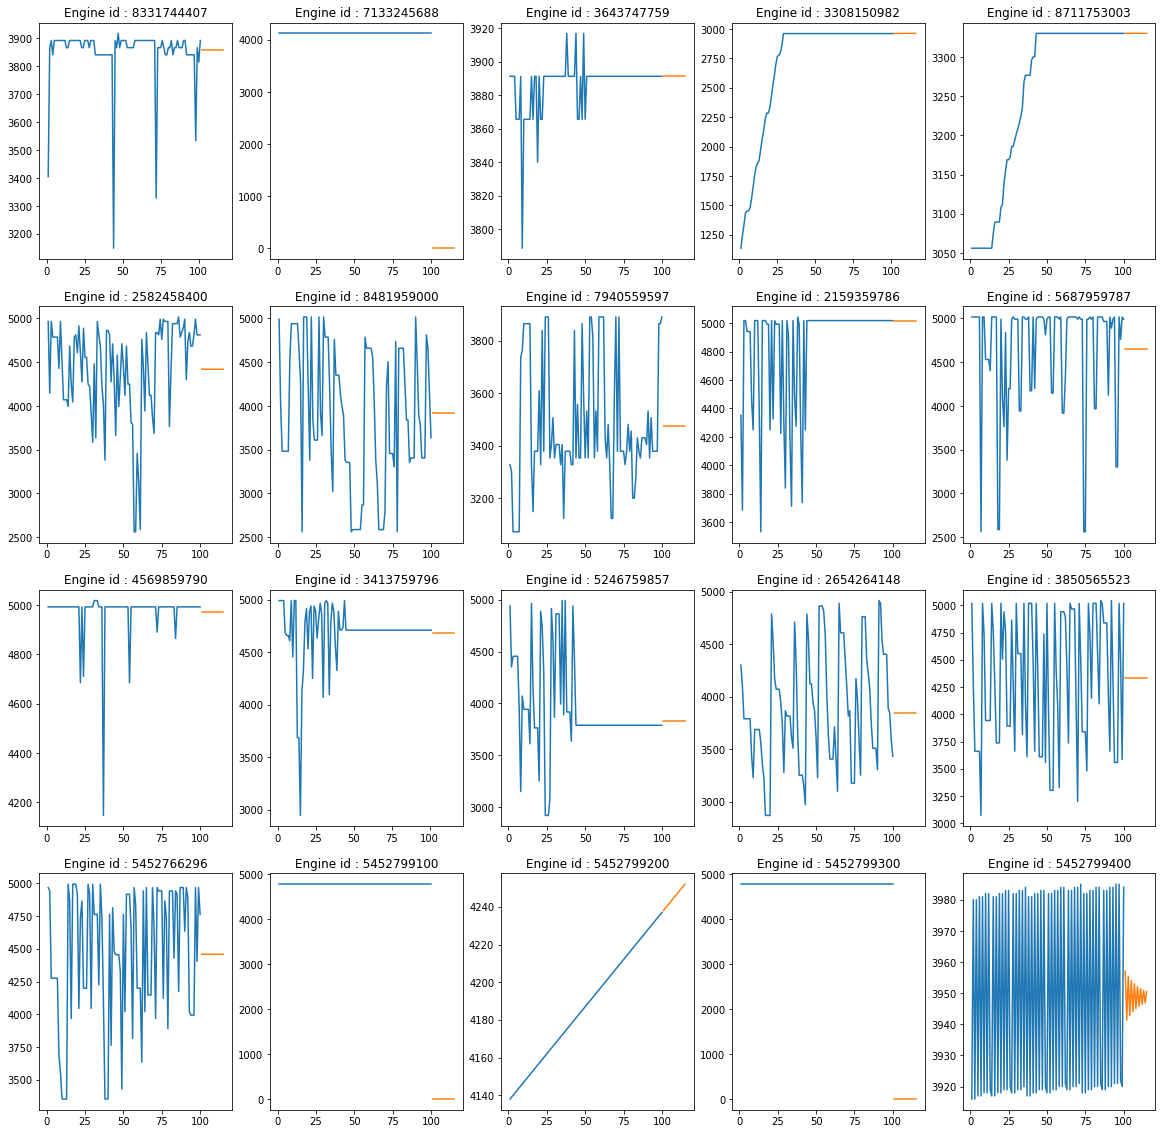

In [16]:
w = 0
f, a = plt.subplots(4, 5, figsize = (20, 20))
for j in range(4):
    for k in range(5):
        a[j,k].plot([i for i in range(1, len(unique[w]["fuel_consumption(liter)"])+1)], unique[w]["fuel_consumption(liter)"], label = 'Train')
        a[j,k].plot([i for i in range(len(unique[w]["fuel_consumption(liter)"])+1, len(unique[w]["fuel_consumption(liter)"])+16)], forecast_1[w], label = 'Prediction')
        a[j,k].set_title("Engine id : "+str(ind[w]))
        w = w+1
plt.show()

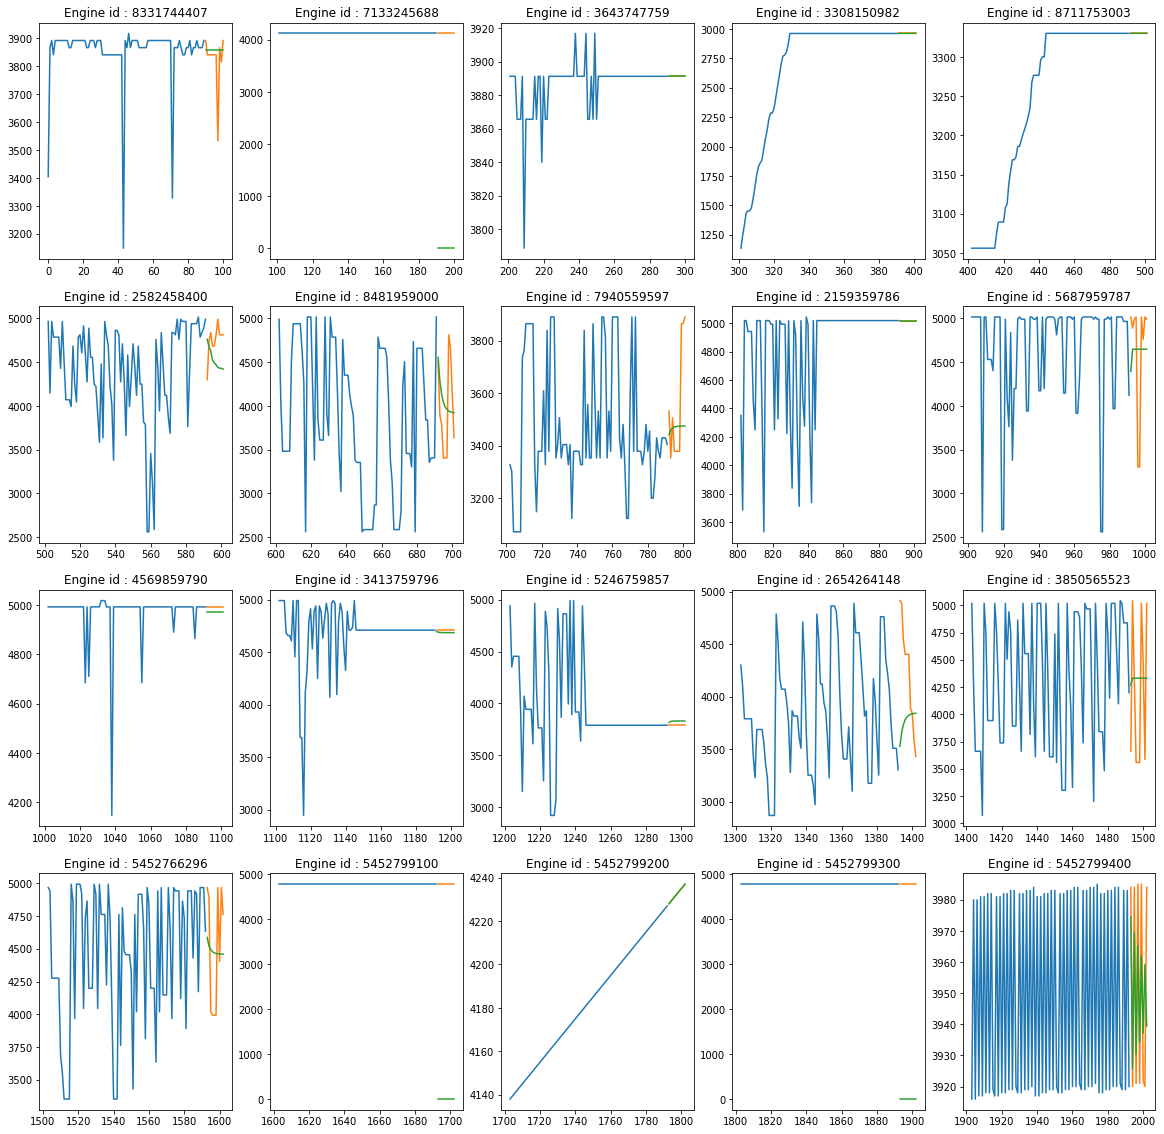

In [17]:
w = 0
f, a = plt.subplots(4, 5, figsize = (20, 20))
for j in range(4):
    for k in range(5):
        a[j,k].plot(train[w], label = 'Train')
        a[j,k].plot(valid[w], label = 'Valid')
        a[j,k].plot(forecast[w], label = 'Prediction')
        a[j,k].set_title("Engine id : "+str(ind[w]))
        w = w+1
plt.show()

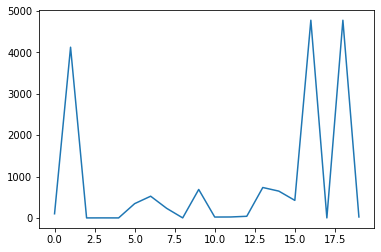

In [18]:
plt.plot(rmse)
plt.show()

In [19]:
d = forecast_1
k = []
for w in range(len(d)):
  k.append(d[w]["Prediction"])
k = pd.DataFrame(k)
v = k.values
v = v.T
i = np.arange(v.shape[1])
a = np.isnan(v).argsort(0, kind='mergesort')
v[:] = v[a, i]
k = k.transpose()
k = k.dropna()
temp = ["Engine ID = "+str(w) for w in ind]
k.to_csv(r"/content/2.csv", header=temp, index=False)